In [37]:
import statistics
import numpy as np
from PIL import Image
import cv2
import pandas as pd
labeled_dir = str("/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled")
# Dicecの計算
def cal_DiceMulitple(dir, input_name):
    # change the label count as your preference
    Dice = [0] * 11
    Count1 = [0] * 11 #予測結果の各ラベルの要素数
    Count2 = [0] * 11 #ラベル画像の
    Count3 = [0] * 11 #正解した画素数
    
    for index in range(len(input_name)):
        print('index = ', index)

        img1 = cv2.imread(dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(labeled_dir + '/' + input_name[index] + ".png", cv2.IMREAD_GRAYSCALE)
        #_, img2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY)
        print("予測画像:", dir  + '/' + input_name[index] + ".png")
        print("テストラベル:", labeled_dir + '/' + input_name[index] + ".png")
        unique_label1 = np.unique(img1)
        unique_label2 = np.unique(img2)
        # print(unique_label1)
        # print(unique_label2)
        # change the image array size to your need
        for n in range(256):
            for l in range(256):
                value1 = img1[n,l]
                # for index, uq_value in enumerate(unique_label1):
                #     if(value1 == uq_value):
                #         value1 = index

                Count1[value1] += 1

                value2 = img2[n,l]
                Count2[value2] += 1                    

                if(value1 == value2):
                    Count3[value1] += 1 
    for i in range(11):
        if(Count1[i]+Count2[i] != 0):
            Dice[i] = (2*Count3[i])/(Count1[i] + Count2[i])
        if(Count1[i]+Count2[i] == 0):
            print("")
            #print("4 label case:" + str(input_name[index]))
    Dice.append(statistics.mean(Dice[1:]))
    print('Count1 = ', Count1)
    print('Count2 = ', Count2)
    print('Count3 = ', Count3)
    print('Dice = ', Dice)
    #print(unique_label)

    return Dice


In [38]:
import os
# ファイル名の先頭部分（prefix）により自動的にファイル名を抽出するアルゴリズム。

""" 

Extracts filenames in directory if they start with the prefix input 


Args/Parameters:

    directory_path (string): The path of the dir (ex: /root/home/Documents/etc)
    
    prefix (string): Prefix of the file name (ex: 'Bo' is a prefix of 'Bone')

Returns:

    sorted_file_names (list of str): File names sorted in ascending order in the dir without extension ex: ['bone1', 'bone2', ...]

Raises:

    SomeError: ...

"""

def file_names_with_prefix(directory_path, prefix):

    # Initialize an empty list to store the file names without extensions
    file_names_without_extension = []

    # Loop through all files in the specified directory
    for filename in os.listdir(directory_path):
        #Checking if the file in loop exists in the directory_path not sure how is this necessary
        #??
        if os.path.isfile(os.path.join(directory_path, filename)):
            # Check if the file name starts with the specified prefix
            if filename.startswith(prefix):
                # Get the file name without extension
                name_without_extension, _ = os.path.splitext(filename)

                # Append the file name (without extension) to the list
                file_names_without_extension.append(name_without_extension)

    # Sort the list of file names without extensions in ascending order
    sorted_file_names = sorted(
        file_names_without_extension,
        key=lambda x: (x.split('-')[0], int(x.split('-')[1]))
    )  # Modify this part based on your file naming convention

    # Now you have a sorted list of file names with the specified prefix and without extensions
    return sorted_file_names


In [39]:

#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/1-20250206-Unet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/2-20250205-MCunet-CRF-HP/fold1/crf")
#searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/3-20250208-TransUnet-CRF-HP/fold1/crf")

#unet
searchdir = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108")
#mcunet
searchdir2 = str("/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)")
print(searchdir)


/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-1.png
image: N1-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-2.png
image: N1-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-3.png
image: N1-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-4.png
image: N1-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP

[ WARN:0@6954.996] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@6954.996] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@6954.996] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-1.png'): can't open/read file: check file path/integrity
[ WARN:0@6954.998] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-2.png'): can't open/read file: check file path/integrity
[ WARN:0@6954.998] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Exte

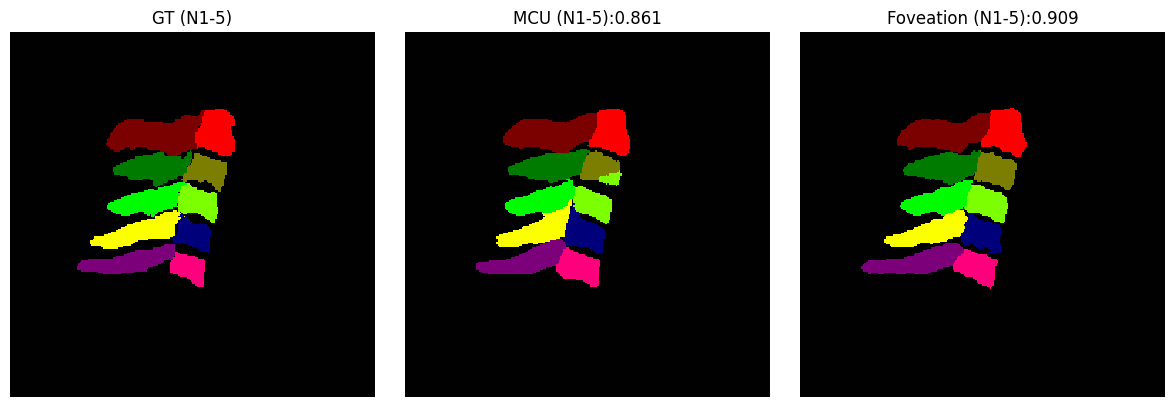

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-6.png
image: N1-6 not found


[ WARN:0@6955.183] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-6.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.183] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N1-6.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.183] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-6.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.184] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-7.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.184] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Exte

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-7.png
image: N1-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-8.png
image: N1-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-9.png
image: N1-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N1-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N1-10.png
Count1 =  [58356, 918, 795, 768, 582, 791, 518, 777, 491, 976, 564]
Count2 =  [58529, 861, 742, 869, 516, 851, 534, 729, 515, 854, 536]
Count3 =  [57917, 785, 703, 734, 494, 736, 4

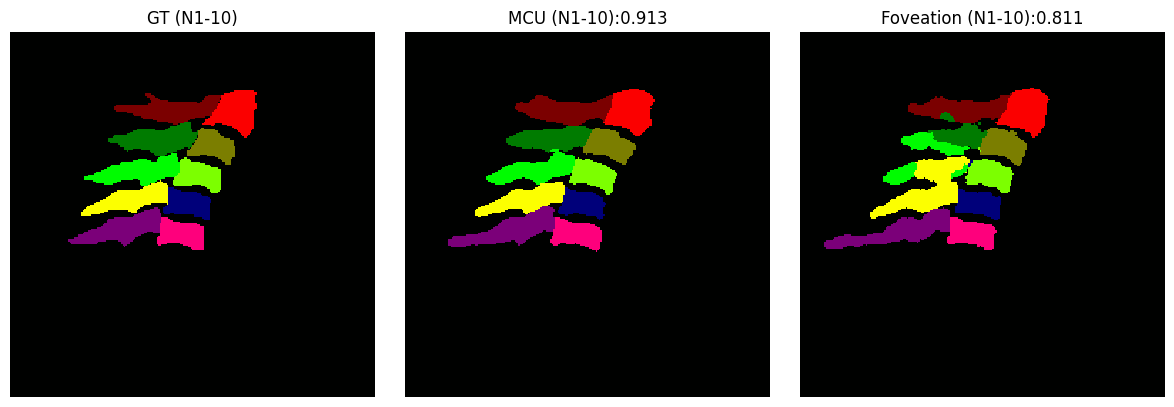

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-1.png
image: N2-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-2.png
image: N2-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-3.png
image: N2-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-4.png
Count1 =  [58103, 1337, 878, 878, 593, 291, 549, 710, 577, 1077, 543]
Count2 =  [57949, 1152, 823, 809, 670, 672, 640, 679, 561, 953, 628]
Count3 =  [57183, 1114, 736, 764, 576, 195,

[ WARN:0@6955.450] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-1.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.450] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N2-1.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.450] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-1.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.451] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-2.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.451] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Exte

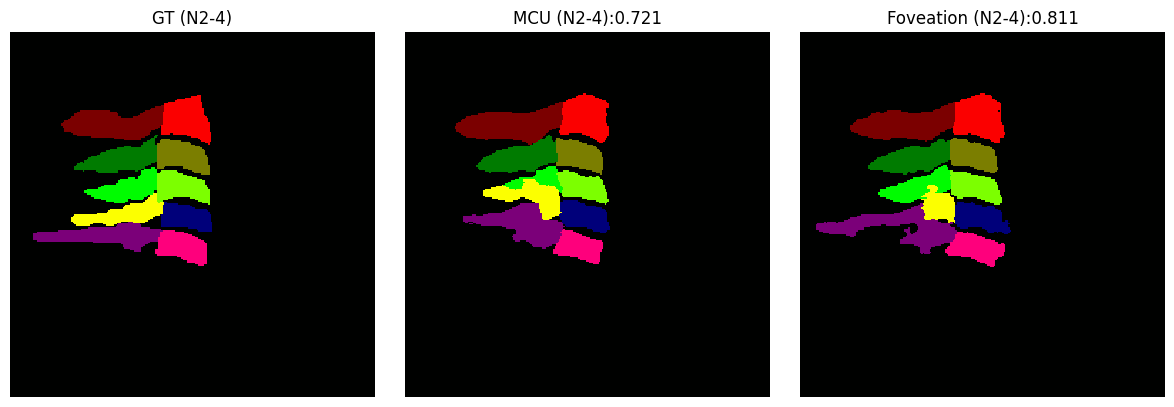

[ WARN:0@6955.630] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-5.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.630] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N2-5.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.630] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-5.png'): can't open/read file: check file path/integrity


index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-5.png
image: N2-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-6.png
Count1 =  [57920, 1268, 781, 791, 564, 698, 554, 805, 588, 990, 577]
Count2 =  [57830, 1304, 882, 833, 510, 705, 582, 732, 618, 964, 576]
Count3 =  [57412, 1220, 775, 737, 494, 658, 537, 723, 568, 869, 548]
Dice =  [0.992, 0.9486780715396579, 0.9320505111244738, 0.9076354679802956, 0.9199255121042831, 0.9379900213827512, 0.9454225352112676, 0.940793754066363, 0.9419568822553898, 0.8894575230296827, 0.9505637467476149, 0.9314474025441779]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N2-6.png
テストラベル: /home/eric/Documents/ce

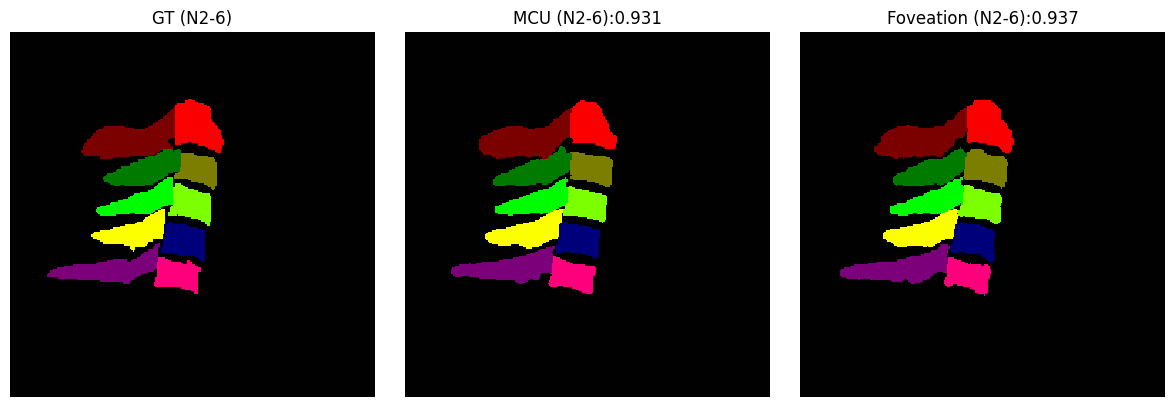

[ WARN:0@6955.807] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-7.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.807] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N2-7.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.807] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-7.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.809] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-8.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.809] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Exte

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-7.png
image: N2-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-8.png
image: N2-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-9.png
Count1 =  [60484, 903, 652, 554, 289, 299, 182, 505, 489, 734, 445]
Count2 =  [59499, 957, 624, 596, 480, 565, 501, 592, 458, 826, 438]
Count3 =  [58941, 873, 586, 374, 269, 52, 1, 0, 0, 1, 0]
Dice =  [0.9824891859680122, 0.9387096774193548, 0.9184952978056427, 0.6504347826086957, 0.6996098829648895, 0.12037037037037036, 0.0029282576866764276, 0.0, 0.0, 0.001282051282051282, 0.0, 0.3331830

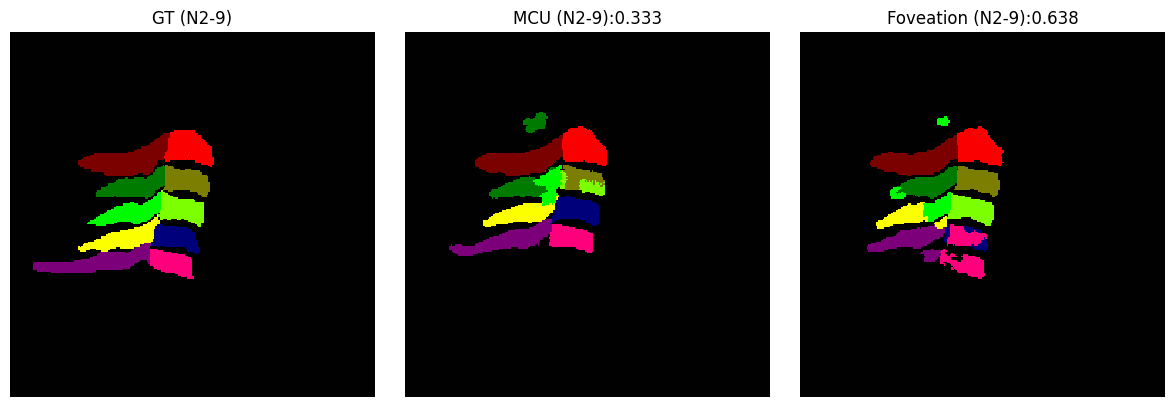

[ WARN:0@6955.987] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-10.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.987] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N2-10.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.987] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-10.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.988] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-1.png'): can't open/read file: check file path/integrity
[ WARN:0@6955.988] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&E

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N2-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N2-10.png
image: N2-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-1.png
image: N3-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-2.png
image: N3-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-3.png
image: N3-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-4.png
テストラベル: /home/eric/Documents/cervicalResearch

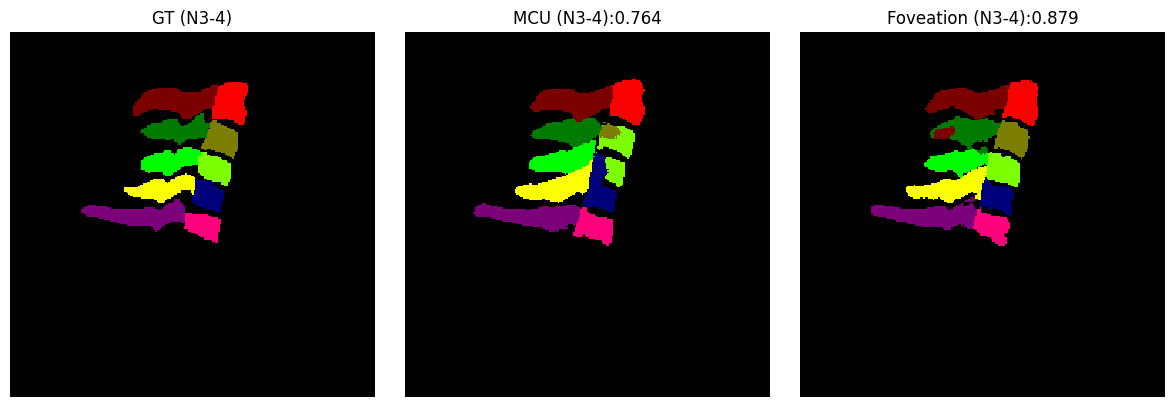

[ WARN:0@6956.167] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-5.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.167] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N3-5.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.167] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-5.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.168] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-6.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.168] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Exte

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-5.png
image: N3-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-6.png
image: N3-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-7.png
image: N3-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-8.png
Count1 =  [59249, 1017, 540, 697, 485, 620, 496, 646, 629, 881, 276]
Count2 =  [59661, 836, 507, 708, 428, 601, 476, 613, 458, 838, 410]
Count3 =  [58935, 821, 488, 646, 419, 557, 42

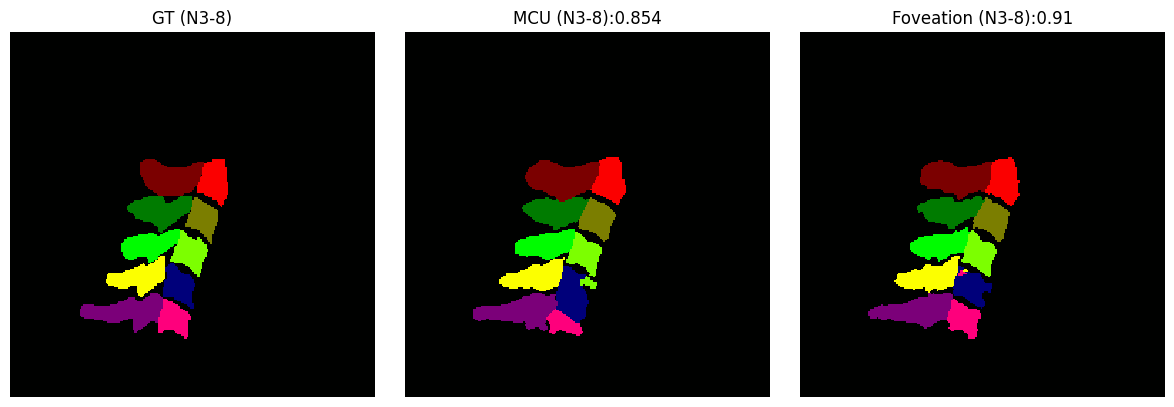

[ WARN:0@6956.349] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-9.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.349] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N3-9.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.350] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-9.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.351] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-10.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.351] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Ext

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-9.png
image: N3-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N3-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N3-10.png
image: N3-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-1.png
image: N4-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-2.png
image: N4-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-3.png
テストラベル: /home/eric/Documents/cervicalResearch

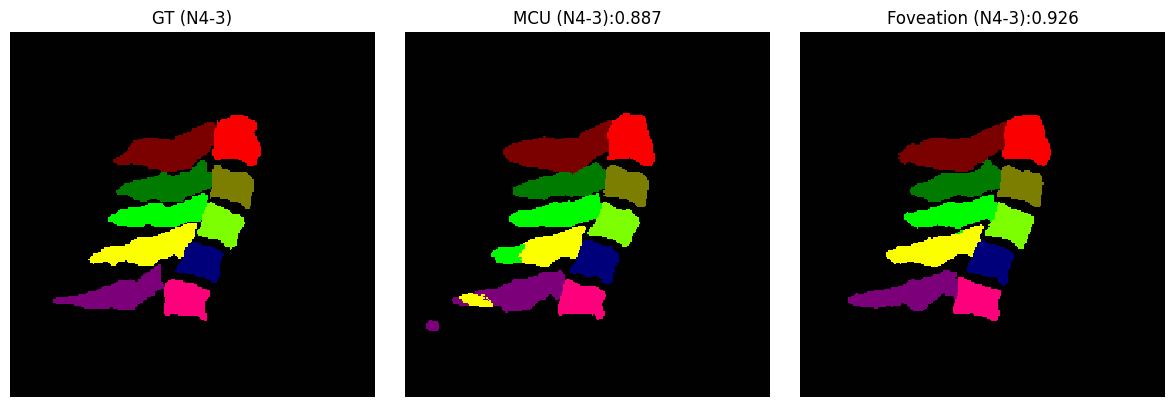

[ WARN:0@6956.541] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-4.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.541] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N4-4.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.541] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-4.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.544] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-5.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.544] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Exte

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-4.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-4.png
image: N4-4 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-5.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-5.png
image: N4-5 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-6.png
image: N4-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-7.png
image: N4-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP

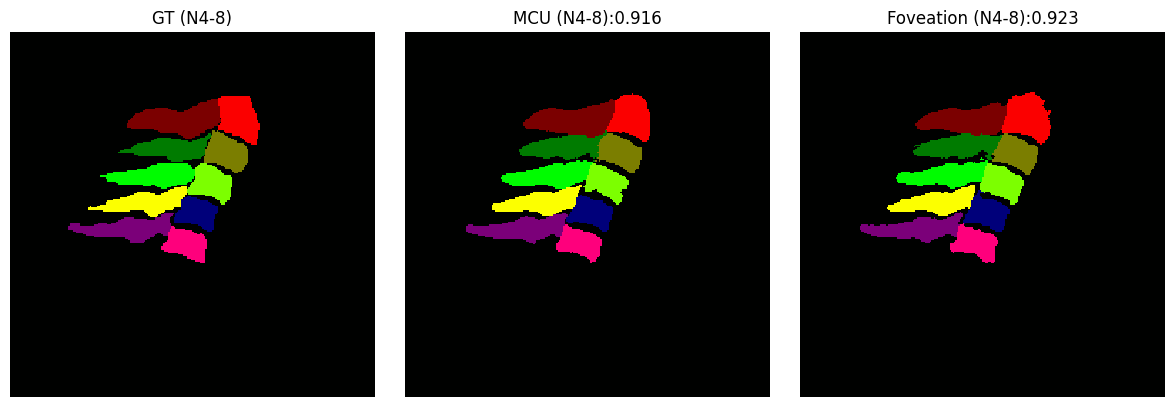

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
Count1 =  [58525, 910, 672, 768, 539, 654, 491, 825, 531, 1052, 569]
Count2 =  [58646, 765, 717, 805, 525, 749, 527, 793, 509, 929, 571]
Count3 =  [58059, 707, 645, 689, 506, 614, 485, 733, 482, 908, 535]
Dice =  [0.9910131346493586, 0.8441791044776119, 0.9287257019438445, 0.8760330578512396, 0.9511278195488722, 0.8752672843905915, 0.9528487229862476, 0.9060568603213844, 0.926923076923077, 0.9167087329631499, 0.9385964912280702, 0.9116466852634089]
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N4-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-9.png
Count1 =  [58353, 930, 694, 832, 517, 719, 518, 836, 540, 1039, 558]
Count2 =  [58646, 765, 717, 805, 525, 749, 527, 793, 509, 929, 571]
Count3 =  [58014,

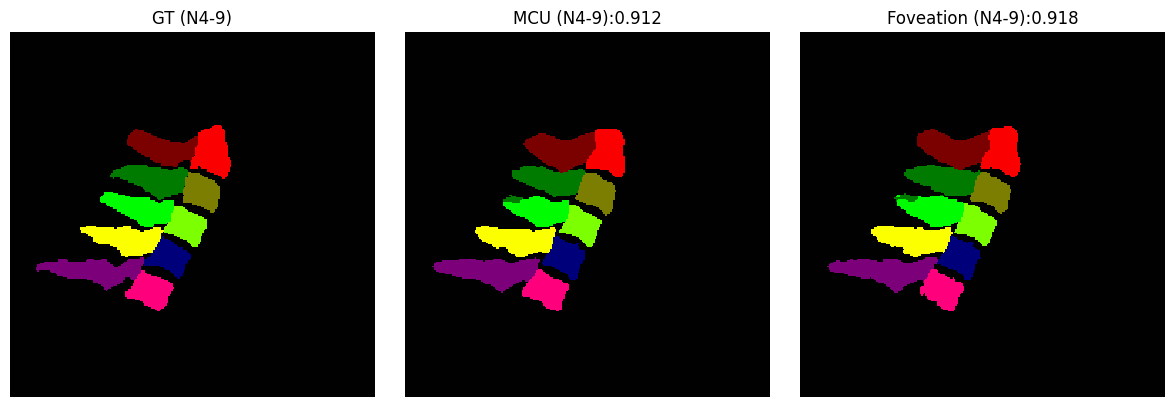

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-10.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png
image: N4-10 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-1.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-1.png
image: N5-1 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-2.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-2.png
image: N5-2 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-3.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-3.png
image: N5-3 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-4.png
テストラベル: /home/eric/Documents/cervicalResearch

[ WARN:0@6956.917] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.917] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-10.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.917] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N4-10.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.917] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N4-10.png'): can't open/read file: check file path/integrity
[ WARN:0@6956.917] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N4-10.png'): can't open/read file: check fi

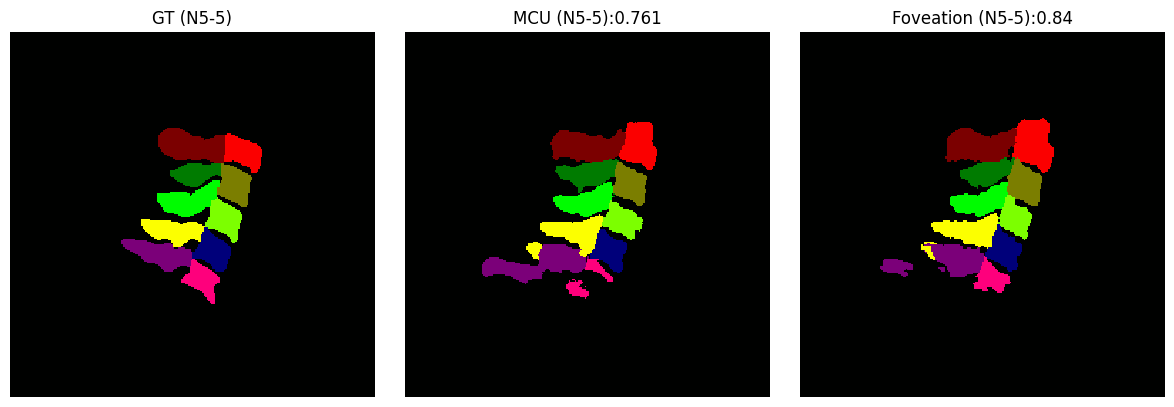

index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-6.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-6.png
image: N5-6 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-7.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png
image: N5-7 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-8.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-8.png
image: N5-8 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-9.png
テストラベル: /home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-9.png
image: N5-9 not found
index =  0
予測画像: /home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-10.png
テストラベル: /home/eric/Documents/cervicalResearchII

[ WARN:0@6957.096] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-6.png'): can't open/read file: check file path/integrity
[ WARN:0@6957.096] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250721-Foveation&MC&Extended (x2, x4)/fold3/crf/N5-6.png'): can't open/read file: check file path/integrity
[ WARN:0@6957.096] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-6.png'): can't open/read file: check file path/integrity
[ WARN:0@6957.097] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/img_1006t/labeled/N5-7.png'): can't open/read file: check file path/integrity
[ WARN:0@6957.097] global loadsave.cpp:248 findDecoder imread_('/home/eric/Documents/cervicalResearchIIP/result_test/20250608-D21MCU-Net108/fold3/crf/N5-7.png'): can't op

In [40]:

fold = "fold3"
imgs_name = []
for i in range(5):
    for j in range (10):
        imgs_name.append(f"N{i+1}-{j+1}")

searchdir =  searchdir + "/" + fold + "/crf"
searchdir2 = searchdir2 + "/"  + fold + "/crf"
    

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
for img_name in imgs_name:
    try:
        img_label = cv2.imread(labeled_dir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE) 
        img = cv2.imread(searchdir + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(searchdir2 + "/" + img_name + ".png", cv2.IMREAD_GRAYSCALE)
        
        
        Dice1 = cal_DiceMulitple(searchdir, [img_name])
        df = pd.DataFrame(Dice1)
        df = df.T

        Dice2 = cal_DiceMulitple(searchdir2, [img_name])
        df = pd.DataFrame(Dice2)
        df = df.T
        
        
        

        fig, axes = plt.subplots(1, 3, figsize=(12, 4)) # figsize=(width, height) in inches
        colors = ['#000100', '#7B0000', '#FB0000', '#007B00', '#7B7E00', '#00FC00', '#7CFF00', '#FCFF00', '#00007A', '#7B0079', '#FE007C']
        cmap = ListedColormap(colors[:11])
        
        # 1. Plot the first image
        axes[0].imshow(img_label, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[0].set_title(f'GT ({img_name})') # Caption for the first plot
        axes[0].axis('off') # Hide axis

        # 2. Plot the first image
        axes[1].imshow(img, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[1].set_title(f'MCU ({img_name}):{np.round(Dice1[-1], 3)}') # Caption for the first plot
        axes[1].axis('off') # Hide axis

        # 3. Plot the second image
        axes[2].imshow(img2, cmap=cmap, vmin=0, vmax=10, interpolation='nearest')
        axes[2].set_title(f'Foveation ({img_name}):{np.round(Dice2[-1], 3)}') # Caption for the second plot
        axes[2].axis('off') # Hide axis

        # 5. Adjust layout to prevent titles from overlapping and display the plot
        plt.tight_layout()
        plt.show()
    except:
        print(f"image: {img_name} not found")